## GENERATE FIGURES 
### Sunanda Sharma 
### Last update: 2025-02-07

The DIY Raman used in this project is the Open Raman system (https://www.open-raman.org/), Starter 
Version. This notebook goes along with generate_calibration and apply_calibration, and assumes you
have processed data already prepared. It generates figures using Arcadia's style guide. 

### The aims of this notebook are: 
* To plot processed data from solid and liquid configurations, and time series data
* To apply additional processing (scaling, additional baselining) to highlight relevant
information for the pub figures

### Set up

This step imports packages, libraries, and modules necessary to run this notebook and creates 
the necessary folders for the notebook outputs. 

In [1]:
# Imports

import os

import arcadia_pycolor as apc
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pybaselines.polynomial import modpoly
from pybaselines.whittaker import airpls

apc.mpl.setup()
%matplotlib widget

### Figure 1: Overview Figure with Acetonitrile

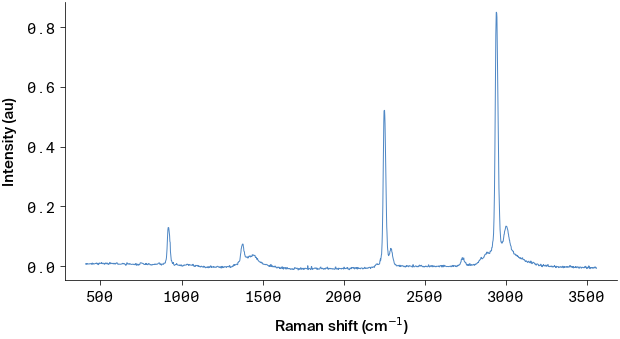

In [2]:
# Load data

df_acetonitrile_10000 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_1000_0_5.csv"
)

# Plot data

figure_size = apc.mpl.get_figure_dimensions("float_wide")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

ax.plot(
    df_acetonitrile_10000["Raman shift (cm-1)"],
    df_acetonitrile_10000["Baselined Filtered Intensity (a.u.)"],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")
apc.mpl.save_figure(
    "../figures/fig1/Fig1_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 2: Neon and Dark Comparison

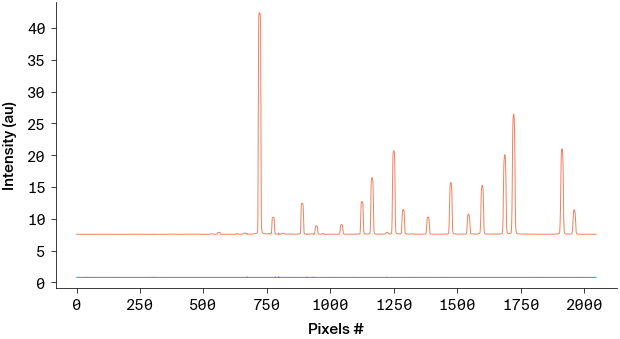

In [3]:
# Load data

df_dark_spec = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_darkspectrum_n_n_n_solid_10000_0_5.csv"
)
df_neon_spec = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/" "2024-10-18_neon_n_n_n_solid_1000_0_5.csv"
)

# Plot data

figure_size = apc.mpl.get_figure_dimensions("float_wide")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

ax.plot(
    df_dark_spec["Pixels #"],
    df_dark_spec["Intensity (a.u.)"],
    df_neon_spec["Pixels #"],
    df_neon_spec["Intensity (a.u.)"],
    lw=1,
)

ax.set_xlabel("Pixels #")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig2/Fig2_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 3: Acetonitrile Parameter Sweep

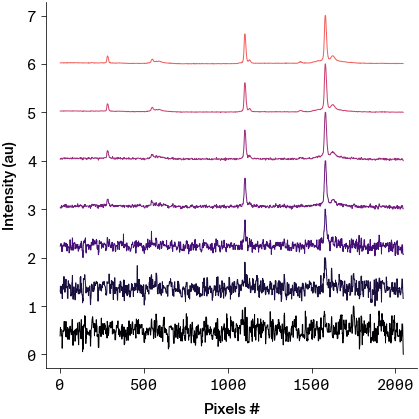

In [4]:
# Load data

df_acn_1ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_1_0_5.csv"
)
df_acn_5ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_5_0_5.csv"
)
df_acn_10ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_10_0_5.csv"
)
df_acn_50ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_50_0_5.csv"
)
df_acn_100ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_100_0_5.csv"
)
df_acn_501ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_501_0_5.csv"
)
df_acn_1000ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_1000_0_5.csv"
)
df_acn_5011ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_5011_0_5.csv"
)
df_acn_10000ms = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_acetonitrileinquartzcuvette_n_n_n_solid_10000_0_5.csv"
)


def minmax_scale(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())


# Min max scale the Baselined Filtered intensity column for each dataframe

df_acn_1ms["Scaled Intensity"] = minmax_scale(df_acn_1ms, "Baselined Filtered Intensity (a.u.)")
df_acn_5ms["Scaled Intensity"] = minmax_scale(df_acn_5ms, "Baselined Filtered Intensity (a.u.)")
df_acn_10ms["Scaled Intensity"] = minmax_scale(df_acn_10ms, "Baselined Filtered Intensity (a.u.)")
df_acn_50ms["Scaled Intensity"] = minmax_scale(df_acn_50ms, "Baselined Filtered Intensity (a.u.)")
df_acn_100ms["Scaled Intensity"] = minmax_scale(df_acn_100ms, "Baselined Filtered Intensity (a.u.)")
df_acn_501ms["Scaled Intensity"] = minmax_scale(df_acn_501ms, "Baselined Filtered Intensity (a.u.)")
df_acn_1000ms["Scaled Intensity"] = minmax_scale(
    df_acn_1000ms, "Baselined Filtered Intensity (a.u.)"
)
df_acn_5011ms["Scaled Intensity"] = minmax_scale(
    df_acn_5011ms, "Baselined Filtered Intensity (a.u.)"
)
df_acn_10000ms["Scaled Intensity"] = minmax_scale(
    df_acn_10000ms, "Baselined Filtered Intensity (a.u.)"
)

# Plot data with offsets using magma color gradient

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = plt.cm.magma(np.linspace(0, 1, len(offsets)))

ax.plot(df_acn_1ms["Pixels #"], df_acn_1ms["Scaled Intensity"] + offsets[0], color=colors[0], lw=1)
ax.plot(df_acn_5ms["Pixels #"], df_acn_5ms["Scaled Intensity"] + offsets[1], color=colors[1], lw=1)
ax.plot(
    df_acn_10ms["Pixels #"], df_acn_10ms["Scaled Intensity"] + offsets[2], color=colors[2], lw=1
)
ax.plot(
    df_acn_50ms["Pixels #"], df_acn_50ms["Scaled Intensity"] + offsets[3], color=colors[3], lw=1
)
ax.plot(
    df_acn_100ms["Pixels #"], df_acn_100ms["Scaled Intensity"] + offsets[4], color=colors[4], lw=1
)
ax.plot(
    df_acn_501ms["Pixels #"], df_acn_501ms["Scaled Intensity"] + offsets[5], color=colors[5], lw=1
)
ax.plot(
    df_acn_1000ms["Pixels #"], df_acn_1000ms["Scaled Intensity"] + offsets[6], color=colors[6], lw=1
)

ax.set_xlabel("Pixels #")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig3/Fig3A_base.svg",
    dpi=300,
    context="web",
)

plt.show()

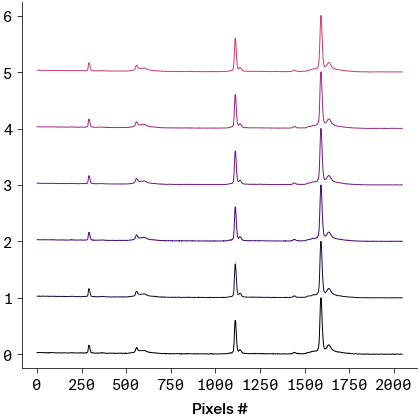

In [5]:
# Load data

df_acn_1avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_1.csv"
)
df_acn_2avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_2.csv"
)
df_acn_5avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_5.csv"
)
df_acn_8avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_8.csv"
)
df_acn_10avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_10.csv"
)
df_acn_20avg = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_acetonitrile_n_n_n_solid_1000_0_20.csv"
)

# Min max scale the baselined filtered intensity column for each dataframe

df_acn_1avg["Scaled Intensity"] = minmax_scale(df_acn_1avg, "Baselined Filtered Intensity (a.u.)")
df_acn_2avg["Scaled Intensity"] = minmax_scale(df_acn_2avg, "Baselined Filtered Intensity (a.u.)")
df_acn_5avg["Scaled Intensity"] = minmax_scale(df_acn_5avg, "Baselined Filtered Intensity (a.u.)")
df_acn_8avg["Scaled Intensity"] = minmax_scale(df_acn_8avg, "Baselined Filtered Intensity (a.u.)")
df_acn_10avg["Scaled Intensity"] = minmax_scale(df_acn_10avg, "Baselined Filtered Intensity (a.u.)")
df_acn_20avg["Scaled Intensity"] = minmax_scale(df_acn_20avg, "Baselined Filtered Intensity (a.u.)")

# Plot data with offsets using magma color gradient

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = plt.cm.magma(np.linspace(0, 1, len(offsets)))

ax.plot(
    df_acn_1avg["Pixels #"], df_acn_1avg["Scaled Intensity"] + offsets[0], color=colors[0], lw=1
)
ax.plot(
    df_acn_2avg["Pixels #"], df_acn_2avg["Scaled Intensity"] + offsets[1], color=colors[1], lw=1
)
ax.plot(
    df_acn_5avg["Pixels #"], df_acn_5avg["Scaled Intensity"] + offsets[2], color=colors[2], lw=1
)
ax.plot(
    df_acn_8avg["Pixels #"], df_acn_8avg["Scaled Intensity"] + offsets[3], color=colors[3], lw=1
)
ax.plot(
    df_acn_10avg["Pixels #"], df_acn_10avg["Scaled Intensity"] + offsets[4], color=colors[4], lw=1
)
ax.plot(
    df_acn_20avg["Pixels #"], df_acn_20avg["Scaled Intensity"] + offsets[5], color=colors[5], lw=1
)

ax.set_xlabel("Pixels #")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures" "/fig3/Fig3B_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 6: Background Comparisons

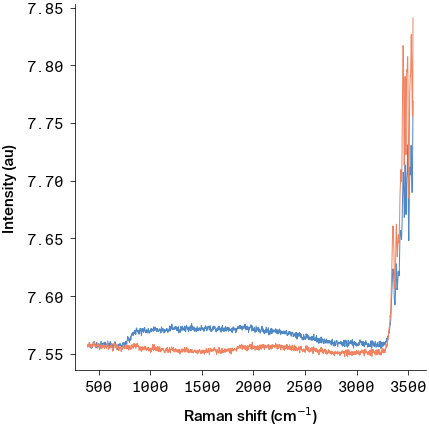

In [6]:
# Load data

df_borosilicate_tube = pd.read_csv(
    "../data/processed/processed_data/2024-08-27/"
    "2024-08-27_borosilicatetube_n_n_y_liquid_1000_0_5.csv"
)

df_nosample_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-27/" "2024-08-27_nosample_n_n_y_liquid_1000_0_5.csv"
)
df_stainless = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/" "2024-10-11_stainless_n_n_n_solid_1000_0_5.csv"
)
df_blackfoil = pd.read_csv(
    "../data/processed/processed_data/2024-08-27/" "2024-08-27_blackfoil_n_n_y_solid_1000_0_5.csv"
)

# Plot the borosilicate and no sample liquid data

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

ax.plot(
    df_borosilicate_tube["Raman shift (cm-1) adjusted"],
    df_borosilicate_tube["Intensity (a.u.)"],
    lw=1,
    label="Borosilicate tube",
)
ax.plot(
    df_nosample_liquid["Raman shift (cm-1) adjusted"],
    df_nosample_liquid["Intensity (a.u.)"],
    lw=1,
    label="No sample liquid",
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "/Users/sunanda/Documents/GitHub/2025-diyraman-bio/figures" "/fig6/Fig6A_base.svg",
    dpi=300,
    context="web",
)

plt.show()

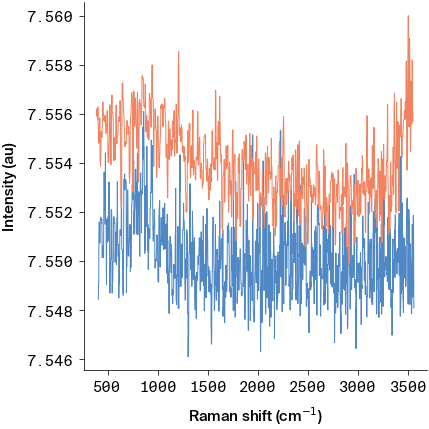

In [7]:
# Plot the stainless and black foil data

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

ax.plot(
    df_stainless["Raman shift (cm-1) adjusted"],
    df_stainless["Filtered Intensity (a.u.)"],
    lw=1,
    label="Stainless",
)

ax.plot(
    df_blackfoil["Raman shift (cm-1) adjusted"],
    df_blackfoil["Filtered Intensity (a.u.)"],
    lw=1,
    label="Black foil",
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig6/Fig6B_base.svg",
    dpi=300,
    context="web",
)

### Figure 7: Solvents

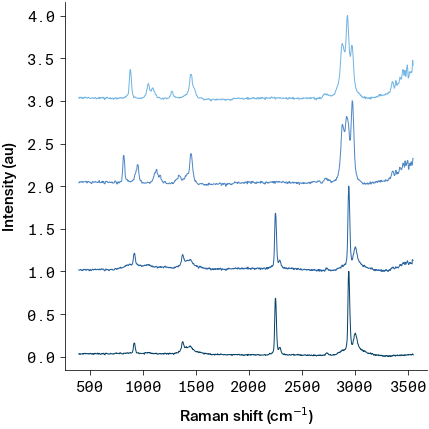

In [8]:
# Load data

df_acn_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_acetonitrileinquartzcuvette_n_n_y_solid_1000_0_5.csv"
)
df_acn_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-28/"
    "2024-08-28_acetonitrile_n_n_y_liquid_1000_0_5.csv"
)
df_isopropanol_liquid = pd.read_csv(
    "../data/processed/processed_data/"
    "2024-08-28/2024-08-28_isopropanol_n_n_y_liquid_1000_0_5.csv"
)
df_ethanol_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-27" "/2024-08-27_ethanol_n_n_y_liquid_1000_0_5.csv"
)

# Min max scale the filtered intensity column for each dataframe using the minmax_scale function

df_acn_solid["Scaled Intensity"] = minmax_scale(df_acn_solid, "Filtered Intensity (a.u.)")
df_acn_liquid["Scaled Intensity"] = minmax_scale(df_acn_liquid, "Filtered Intensity (a.u.)")
df_isopropanol_liquid["Scaled Intensity"] = minmax_scale(
    df_isopropanol_liquid, "Filtered Intensity (a.u.)"
)
df_ethanol_liquid["Scaled Intensity"] = minmax_scale(df_ethanol_liquid, "Filtered Intensity (a.u.)")

# Plot data with offsets using blues

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.blue_shades.colors[0:4]

ax.plot(
    df_acn_solid["Raman shift (cm-1) adjusted"],
    df_acn_solid["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
    label="Acetonitrile (solid)",
)
ax.plot(
    df_acn_liquid["Raman shift (cm-1) adjusted"],
    df_acn_liquid["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
    label="Acetonitrile (liquid)",
)
ax.plot(
    df_isopropanol_liquid["Raman shift (cm-1) adjusted"],
    df_isopropanol_liquid["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
    label="Isopropanol",
)
ax.plot(
    df_ethanol_liquid["Raman shift (cm-1) adjusted"],
    df_ethanol_liquid["Scaled Intensity"] + offsets[3],
    color=colors[3],
    lw=1,
    label="Ethanol",
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig7/Fig7_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 8: Glycine Parameter Sweep

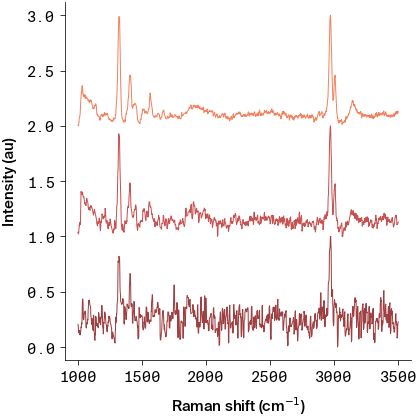

In [9]:
# Load data

df_glycinepowder_100_5 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_glycinepowder_n_n_y_solid_100_0_5.csv"
)
df_glycinepowder_1000_5 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_glycinepowder_n_n_y_solid_1000_0_5.csv"
)
df_glycinepowder_10000_5 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_glycinepowder_n_n_y_solid_10000_0_5.csv"
)

# Crop the data to the range 1000-3500 cm-1

df_glycinepowder_100_5 = df_glycinepowder_100_5[
    (df_glycinepowder_100_5["Raman shift (cm-1)"] >= 1000)
    & (df_glycinepowder_100_5["Raman shift (cm-1)"] <= 3500)
]

df_glycinepowder_1000_5 = df_glycinepowder_1000_5[
    (df_glycinepowder_1000_5["Raman shift (cm-1)"] >= 1000)
    & (df_glycinepowder_1000_5["Raman shift (cm-1)"] <= 3500)
]

df_glycinepowder_10000_5 = df_glycinepowder_10000_5[
    (df_glycinepowder_10000_5["Raman shift (cm-1)"] >= 1000)
    & (df_glycinepowder_10000_5["Raman shift (cm-1)"] <= 3500)
]

# Apply additional baselining using airpls

df_glycinepowder_100_5["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_100_5["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_100_5["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_1000_5["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_5["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_5["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_10000_5["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_10000_5["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_10000_5["Baselined Filtered Intensity (a.u.)"])[0]
)

# Min max scale the re-baselined intensity column for each dataframe

df_glycinepowder_100_5["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_100_5, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_1000_5["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_5, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_10000_5["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_10000_5, "Re-Baselined Intensity (a.u.)"
)

# Plot data with offsets using reds

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.red_shades.colors[0:3]

ax.plot(
    df_glycinepowder_100_5["Raman shift (cm-1)"],
    df_glycinepowder_100_5["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_glycinepowder_1000_5["Raman shift (cm-1)"],
    df_glycinepowder_1000_5["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_glycinepowder_10000_5["Raman shift (cm-1)"],
    df_glycinepowder_10000_5["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig8/Fig8A_base.svg",
    dpi=300,
    context="web",
)

plt.show()

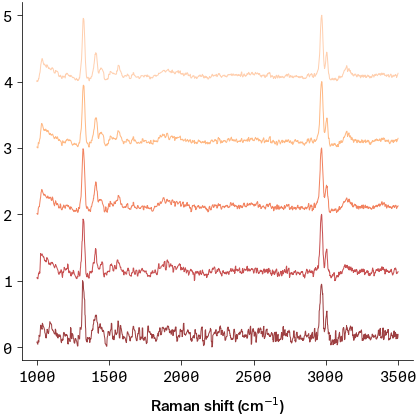

In [10]:
# Load data

df_glycinepowder_1000_1 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_glycinepowder_n_n_y_solid_1000_0_1.csv"
)
df_glycinepowder_1000_5 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_glycinepowder_n_n_y_solid_1000_0_5.csv"
)
df_glycinepowder_1000_10 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_glycinepowder_n_n_y_solid_1000_0_10.csv"
)
df_glycinepowder_1000_20 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_glycinepowder_n_n_y_solid_1000_0_20.csv"
)
df_glycinepowder_1000_100 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_glycinepowder_n_n_y_solid_1000_0_100.csv"
)

# Crop the data to the range 1000-3500 cm-1

df_glycinepowder_1000_1 = df_glycinepowder_1000_1[
    (df_glycinepowder_1000_1["Raman shift (cm-1) adjusted"] >= 1000)
    & (df_glycinepowder_1000_1["Raman shift (cm-1) adjusted"] <= 3500)
]
df_glycinepowder_1000_5 = df_glycinepowder_1000_5[
    (df_glycinepowder_1000_5["Raman shift (cm-1) adjusted"] >= 1000)
    & (df_glycinepowder_1000_5["Raman shift (cm-1) adjusted"] <= 3500)
]
df_glycinepowder_1000_10 = df_glycinepowder_1000_10[
    (df_glycinepowder_1000_10["Raman shift (cm-1) adjusted"] >= 1000)
    & (df_glycinepowder_1000_10["Raman shift (cm-1) adjusted"] <= 3500)
]
df_glycinepowder_1000_20 = df_glycinepowder_1000_20[
    (df_glycinepowder_1000_20["Raman shift (cm-1) adjusted"] >= 1000)
    & (df_glycinepowder_1000_20["Raman shift (cm-1) adjusted"] <= 3500)
]
df_glycinepowder_1000_100 = df_glycinepowder_1000_100[
    (df_glycinepowder_1000_100["Raman shift (cm-1) adjusted"] >= 1000)
    & (df_glycinepowder_1000_100["Raman shift (cm-1) adjusted"] <= 3500)
]

# Apply additional baselining using airpls

df_glycinepowder_1000_1["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_1["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_1["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_1000_5["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_5["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_5["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_1000_10["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_10["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_10["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_1000_20["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_20["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_20["Baselined Filtered Intensity (a.u.)"])[0]
)
df_glycinepowder_1000_100["Re-Baselined Intensity (a.u.)"] = (
    df_glycinepowder_1000_100["Baselined Filtered Intensity (a.u.)"]
    - airpls(df_glycinepowder_1000_100["Baselined Filtered Intensity (a.u.)"])[0]
)

# Min max scale the re-baselined intensity column for each dataframe using minmax_scale

df_glycinepowder_1000_1["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_1, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_1000_5["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_5, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_1000_10["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_10, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_1000_20["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_20, "Re-Baselined Intensity (a.u.)"
)
df_glycinepowder_1000_100["Scaled Intensity"] = minmax_scale(
    df_glycinepowder_1000_100, "Re-Baselined Intensity (a.u.)"
)

# Plot data with offsets using reds

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.red_shades.colors[0:5]

ax.plot(
    df_glycinepowder_1000_1["Raman shift (cm-1) adjusted"],
    df_glycinepowder_1000_1["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_glycinepowder_1000_5["Raman shift (cm-1) adjusted"],
    df_glycinepowder_1000_5["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_glycinepowder_1000_10["Raman shift (cm-1) adjusted"],
    df_glycinepowder_1000_10["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_glycinepowder_1000_20["Raman shift (cm-1) adjusted"],
    df_glycinepowder_1000_20["Scaled Intensity"] + offsets[3],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_glycinepowder_1000_100["Raman shift (cm-1) adjusted"],
    df_glycinepowder_1000_100["Scaled Intensity"] + offsets[4],
    color=colors[4],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")

apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig8/Fig8B_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 9: Biomolecules 

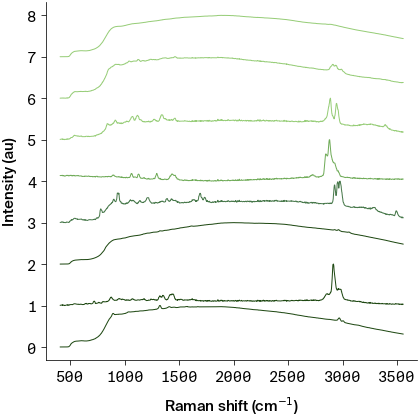

In [11]:
# Load data

df_glycine = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_glycinepowder_n_n_n_solid_10000_0_5.csv"
)
df_methionine = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_l-methioninepowder_n_n_n_solid_10000_0_5.csv"
)
df_tyrosine = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_l-tyrosinepowder_n_n_n_solid_10000_0_5.csv"
)
df_citricacid = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_citricacidpowder_n_n_n_solid_10000_0_5.csv"
)
df_palmiticacid = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_palmiticacidpowder_n_n_n_solid_10000_0_5.csv"
)
df_glucose = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_d-glucosepowder_n_n_n_solid_10000_0_5.csv"
)
df_sucrose = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/2024-10-11_sucrosepowder_n_n_n_solid_10000_0_5.csv"
)
df_methylcellulose = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_methylcellulosepowder_n_n_n_solid_10000_0_5.csv"
)

# Min max scaled the Filtered Intensity column for each dataframe using minmax_scale function

df_glycine["Scaled Intensity"] = minmax_scale(df_glycine, "Filtered Intensity (a.u.)")
df_methionine["Scaled Intensity"] = minmax_scale(df_methionine, "Filtered Intensity (a.u.)")
df_tyrosine["Scaled Intensity"] = minmax_scale(df_tyrosine, "Filtered Intensity (a.u.)")
df_citricacid["Scaled Intensity"] = minmax_scale(df_citricacid, "Filtered Intensity (a.u.)")
df_palmiticacid["Scaled Intensity"] = minmax_scale(df_palmiticacid, "Filtered Intensity (a.u.)")
df_glucose["Scaled Intensity"] = minmax_scale(df_glucose, "Filtered Intensity (a.u.)")
df_sucrose["Scaled Intensity"] = minmax_scale(df_sucrose, "Filtered Intensity (a.u.)")
df_methylcellulose["Scaled Intensity"] = minmax_scale(
    df_methylcellulose, "Filtered Intensity (a.u.)"
)

# Plot data with offsets using greens

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.green_shades.colors[0:8]

ax.plot(
    df_glycine["Raman shift (cm-1) adjusted"],
    df_glycine["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_methionine["Raman shift (cm-1) adjusted"],
    df_methionine["Scaled Intensity"] + offsets[1],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_tyrosine["Raman shift (cm-1) adjusted"],
    df_tyrosine["Scaled Intensity"] + offsets[2],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_citricacid["Raman shift (cm-1) adjusted"],
    df_citricacid["Scaled Intensity"] + offsets[3],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_palmiticacid["Raman shift (cm-1) adjusted"],
    df_palmiticacid["Scaled Intensity"] + offsets[4],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_glucose["Raman shift (cm-1) adjusted"],
    df_glucose["Scaled Intensity"] + offsets[5],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_sucrose["Raman shift (cm-1) adjusted"],
    df_sucrose["Scaled Intensity"] + offsets[6],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_methylcellulose["Raman shift (cm-1) adjusted"],
    df_methylcellulose["Scaled Intensity"] + offsets[7],
    color=colors[3],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig9/Fig9A_base.svg",
    dpi=300,
    context="web",
)

plt.show()

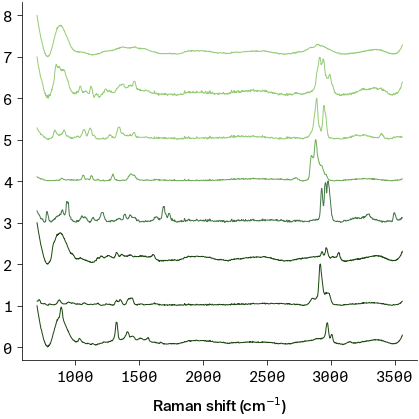

In [12]:
# Crop the data to >700 cm-1

df_glycine = df_glycine[df_glycine["Raman shift (cm-1) adjusted"] > 700]
df_methionine = df_methionine[df_methionine["Raman shift (cm-1) adjusted"] > 700]
df_tyrosine = df_tyrosine[df_tyrosine["Raman shift (cm-1) adjusted"] > 700]
df_citricacid = df_citricacid[df_citricacid["Raman shift (cm-1) adjusted"] > 700]
df_palmiticacid = df_palmiticacid[df_palmiticacid["Raman shift (cm-1) adjusted"] > 700]
df_glucose = df_glucose[df_glucose["Raman shift (cm-1) adjusted"] > 700]
df_sucrose = df_sucrose[df_sucrose["Raman shift (cm-1) adjusted"] > 700]
df_methylcellulose = df_methylcellulose[df_methylcellulose["Raman shift (cm-1) adjusted"] > 700]

# Apply additional baselining using modpoly

df_glycine["Re-Baselined Intensity (a.u.)"] = (
    df_glycine["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_glycine["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_methionine["Re-Baselined Intensity (a.u.)"] = (
    df_methionine["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_methionine["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_tyrosine["Re-Baselined Intensity (a.u.)"] = (
    df_tyrosine["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_tyrosine["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_citricacid["Re-Baselined Intensity (a.u.)"] = (
    df_citricacid["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_citricacid["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_palmiticacid["Re-Baselined Intensity (a.u.)"] = (
    df_palmiticacid["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_palmiticacid["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[
        0
    ]
)
df_glucose["Re-Baselined Intensity (a.u.)"] = (
    df_glucose["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_glucose["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_sucrose["Re-Baselined Intensity (a.u.)"] = (
    df_sucrose["Baselined Filtered Intensity (a.u.)"]
    - modpoly(df_sucrose["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100)[0]
)
df_methylcellulose["Re-Baselined Intensity (a.u.)"] = (
    df_methylcellulose["Baselined Filtered Intensity (a.u.)"]
    - modpoly(
        df_methylcellulose["Baselined Filtered Intensity (a.u.)"], poly_order=11, max_iter=100
    )[0]
)

# Min Max scale the Re-Baselined Intensity column in each dataframe

df_glycine["Scaled Intensity"] = minmax_scale(df_glycine, "Re-Baselined Intensity (a.u.)")
df_methionine["Scaled Intensity"] = minmax_scale(df_methionine, "Re-Baselined Intensity (a.u.)")
df_tyrosine["Scaled Intensity"] = minmax_scale(df_tyrosine, "Re-Baselined Intensity (a.u.)")
df_citricacid["Scaled Intensity"] = minmax_scale(df_citricacid, "Re-Baselined Intensity (a.u.)")
df_palmiticacid["Scaled Intensity"] = minmax_scale(df_palmiticacid, "Re-Baselined Intensity (a.u.)")
df_glucose["Scaled Intensity"] = minmax_scale(df_glucose, "Re-Baselined Intensity (a.u.)")
df_sucrose["Scaled Intensity"] = minmax_scale(df_sucrose, "Re-Baselined Intensity (a.u.)")
df_methylcellulose["Scaled Intensity"] = minmax_scale(
    df_methylcellulose, "Re-Baselined Intensity (a.u.)"
)

# Plot data with offsets using greens

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.green_shades.colors[0:8]

ax.plot(
    df_glycine["Raman shift (cm-1) adjusted"],
    df_glycine["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_methionine["Raman shift (cm-1) adjusted"],
    df_methionine["Scaled Intensity"] + offsets[1],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_tyrosine["Raman shift (cm-1) adjusted"],
    df_tyrosine["Scaled Intensity"] + offsets[2],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_citricacid["Raman shift (cm-1) adjusted"],
    df_citricacid["Scaled Intensity"] + offsets[3],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_palmiticacid["Raman shift (cm-1) adjusted"],
    df_palmiticacid["Scaled Intensity"] + offsets[4],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_glucose["Raman shift (cm-1) adjusted"],
    df_glucose["Scaled Intensity"] + offsets[5],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_sucrose["Raman shift (cm-1) adjusted"],
    df_sucrose["Scaled Intensity"] + offsets[6],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_methylcellulose["Raman shift (cm-1) adjusted"],
    df_methylcellulose["Scaled Intensity"] + offsets[7],
    color=colors[3],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig9/Fig9B_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 10: Glycine dilution series in solid and liquid

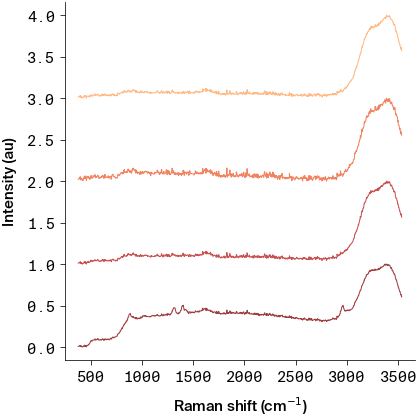

In [13]:
# Load data

df_1Mglycine_solid = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/2024-10-18_1M-Glycine_n_n_n_solid_10000_0_5.csv"
)
df_01Mglycine_solid = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/2024-10-18_0.1M-Glycine_n_n_n_solid_10000_0_5.csv"
)
df_001Mglycine_solid = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/2024-10-18_0.01M-Glycine_n_n_n_solid_10000_0_5.csv"
)
df_0001Mglycine_solid = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_0.001M-Glycine_n_n_n_solid_10000_0_5.csv"
)

# Min max scale the Baselined Filtered Intensity column in each dataset using minmax_scale

df_1Mglycine_solid["Scaled Intensity"] = minmax_scale(
    df_1Mglycine_solid, "Baselined Filtered Intensity (a.u.)"
)
df_01Mglycine_solid["Scaled Intensity"] = minmax_scale(
    df_01Mglycine_solid, "Baselined Filtered Intensity (a.u.)"
)
df_001Mglycine_solid["Scaled Intensity"] = minmax_scale(
    df_001Mglycine_solid, "Baselined Filtered Intensity (a.u.)"
)
df_0001Mglycine_solid["Scaled Intensity"] = minmax_scale(
    df_0001Mglycine_solid, "Baselined Filtered Intensity (a.u.)"
)

# Plot data with offsets using reds

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.red_shades.colors[0:4]

ax.plot(
    df_1Mglycine_solid["Raman shift (cm-1) adjusted"],
    df_1Mglycine_solid["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_01Mglycine_solid["Raman shift (cm-1) adjusted"],
    df_01Mglycine_solid["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_001Mglycine_solid["Raman shift (cm-1) adjusted"],
    df_001Mglycine_solid["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_0001Mglycine_solid["Raman shift (cm-1) adjusted"],
    df_0001Mglycine_solid["Scaled Intensity"] + offsets[3],
    color=colors[3],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig10/Fig10A_base.svg",
    dpi=300,
    context="web",
)

plt.show()

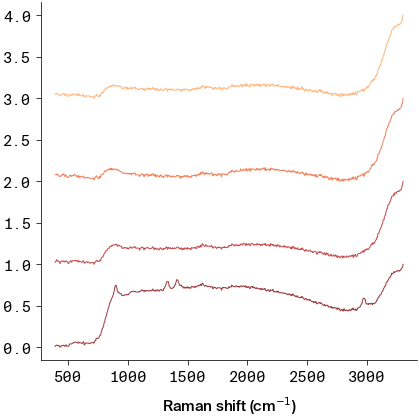

In [14]:
# Load data

df_1Mglycine_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-29/2024-08-29_1M-glycine_n_n_y_liquid_10000_0_5.csv"
)
df_01Mglycine_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-29/2024-08-29_0.1M-glycine_n_n_y_liquid_10000_0_5.csv"
)
df_001Mglycine_liquid = pd.read_csv(
    "../data/processed/processed_data/"
    "2024-08-29/2024-08-29_0.01M-glycine_n_n_y_liquid_10000_0_5.csv"
)
df_0001Mglycine_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-29/"
    "2024-08-29_0.001M-glycine_n_n_y_liquid_10000_0_5.csv"
)

# Crop the data so the upper limit is 3300 cm-1

df_1Mglycine_liquid = df_1Mglycine_liquid[df_1Mglycine_liquid["Raman shift (cm-1)"] < 3300]
df_01Mglycine_liquid = df_01Mglycine_liquid[df_01Mglycine_liquid["Raman shift (cm-1)"] < 3300]
df_001Mglycine_liquid = df_001Mglycine_liquid[df_001Mglycine_liquid["Raman shift (cm-1)"] < 3300]
df_0001Mglycine_liquid = df_0001Mglycine_liquid[df_0001Mglycine_liquid["Raman shift (cm-1)"] < 3300]

# Min Max scale the Baselined Filtered Intensity column in each dataset

df_1Mglycine_liquid["Scaled Intensity"] = minmax_scale(
    df_1Mglycine_liquid, "Baselined Filtered Intensity (a.u.)"
)

df_01Mglycine_liquid["Scaled Intensity"] = minmax_scale(
    df_01Mglycine_liquid, "Baselined Filtered Intensity (a.u.)"
)

df_001Mglycine_liquid["Scaled Intensity"] = minmax_scale(
    df_001Mglycine_liquid, "Baselined Filtered Intensity (a.u.)"
)

df_0001Mglycine_liquid["Scaled Intensity"] = minmax_scale(
    df_0001Mglycine_liquid, "Baselined Filtered Intensity (a.u.)"
)

# Plot data with offsets using reds

figure_size = apc.mpl.get_figure_dimensions("half_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.red_shades.colors[0:4]

ax.plot(
    df_1Mglycine_liquid["Raman shift (cm-1)"],
    df_1Mglycine_liquid["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_01Mglycine_liquid["Raman shift (cm-1)"],
    df_01Mglycine_liquid["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_001Mglycine_liquid["Raman shift (cm-1)"],
    df_001Mglycine_liquid["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_0001Mglycine_liquid["Raman shift (cm-1)"],
    df_0001Mglycine_liquid["Scaled Intensity"] + offsets[3],
    color=colors[3],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig10/Fig10B_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 11: Minerals and Salts

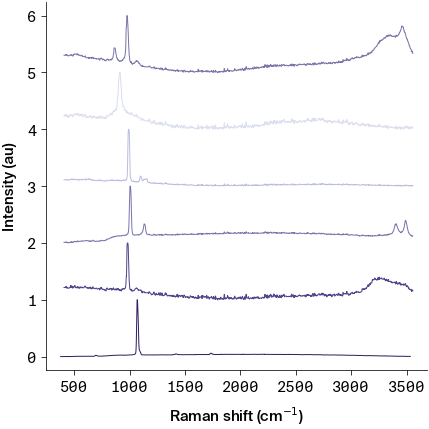

In [15]:
# Load data

df_calcite = pd.read_csv(
    "../data/processed/processed_data/2024-10-18/"
    "2024-10-18_Wardscalcite_n_n_n_solid_10000_0_5.csv"
)
df_mgso4 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_magnesiumsulfateheptahydratepowder_n_n_n_solid_10000_0_5.csv"
)
df_caso4 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_calciumsulfatepowder_n_n_n_solid_10000_0_5.csv"
)
df_naso4 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_sodiumsulfatepowder_n_n_n_solid_10000_0_5.csv"
)
df_potpo4 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/"
    "2024-10-11_potassiumphosphatemonobasicpowder_n_n_n_solid_10000_0_5.csv"
)
df_sodpo4 = pd.read_csv(
    "../data/processed/processed_data/2024-10-11/2024-10-11_"
    "sodiumphosphatedibasicheptahydratepowder_n_n_n_solid_10000_0_5.csv"
)

# Min max scale the Baselined Filtered Intensity column in each dataset using minmax_scale

df_calcite["Scaled Intensity"] = minmax_scale(df_calcite, "Baselined Filtered Intensity (a.u.)")
df_mgso4["Scaled Intensity"] = minmax_scale(df_mgso4, "Baselined Filtered Intensity (a.u.)")
df_caso4["Scaled Intensity"] = minmax_scale(df_caso4, "Baselined Filtered Intensity (a.u.)")
df_naso4["Scaled Intensity"] = minmax_scale(df_naso4, "Baselined Filtered Intensity (a.u.)")
df_potpo4["Scaled Intensity"] = minmax_scale(df_potpo4, "Baselined Filtered Intensity (a.u.)")
df_sodpo4["Scaled Intensity"] = minmax_scale(df_sodpo4, "Baselined Filtered Intensity (a.u.)")

# Plot data with offsets using purples

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.purple_shades.colors[0:6]

ax.plot(
    df_calcite["Raman shift (cm-1) adjusted"],
    df_calcite["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)
ax.plot(
    df_mgso4["Raman shift (cm-1) adjusted"],
    df_mgso4["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)
ax.plot(
    df_caso4["Raman shift (cm-1) adjusted"],
    df_caso4["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)
ax.plot(
    df_naso4["Raman shift (cm-1) adjusted"],
    df_naso4["Scaled Intensity"] + offsets[3],
    color=colors[3],
    lw=1,
)
ax.plot(
    df_potpo4["Raman shift (cm-1) adjusted"],
    df_potpo4["Scaled Intensity"] + offsets[4],
    color=colors[4],
    lw=1,
)
ax.plot(
    df_sodpo4["Raman shift (cm-1) adjusted"],
    df_sodpo4["Scaled Intensity"] + offsets[5],
    color=colors[2],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig11/Fig11_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 12: Biological Samples (Solid vs Liquid)

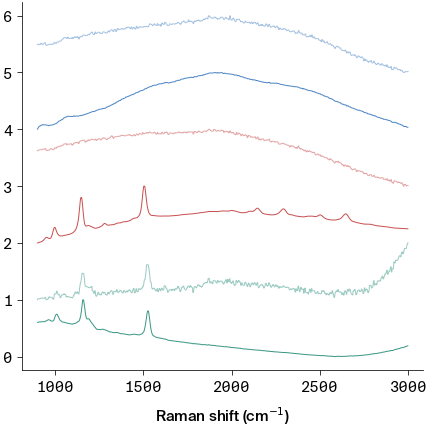

In [16]:
# Load data

df_chlamy_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Chlamy124"
    "solidcultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_chlamy_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-27/2024-08-27_chlamycc124"
    "liquid_n_n_y_liquid_10000_0_5.csv"
)
df_hsal_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Hsalsolid"
    "cultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_hsal_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-29/2024-08-29_Hsal"
    "liqcultureRep1_n_n_y_liquid_10000_0_5.csv"
)
df_ecoli_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Ecoli"
    "K12solidcultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_ecoli_liquid = pd.read_csv(
    "../data/processed/processed_data/2024-08-29/2024-08-29_Ecoli"
    "liqcultureRep1_n_n_y_liquid_10000_0_5.csv"
)

# Crop the data to the range 900-3000 cm-1

df_chlamy_solid = df_chlamy_solid[
    (df_chlamy_solid["Raman shift (cm-1)"] >= 900) & (df_chlamy_solid["Raman shift (cm-1)"] <= 3000)
]
df_chlamy_liquid = df_chlamy_liquid[
    (df_chlamy_liquid["Raman shift (cm-1)"] >= 900)
    & (df_chlamy_liquid["Raman shift (cm-1)"] <= 3000)
]
df_hsal_solid = df_hsal_solid[
    (df_hsal_solid["Raman shift (cm-1)"] >= 900) & (df_hsal_solid["Raman shift (cm-1)"] <= 3000)
]
df_hsal_liquid = df_hsal_liquid[
    (df_hsal_liquid["Raman shift (cm-1)"] >= 900) & (df_hsal_liquid["Raman shift (cm-1)"] <= 3000)
]
df_ecoli_solid = df_ecoli_solid[
    (df_ecoli_solid["Raman shift (cm-1)"] >= 900) & (df_ecoli_solid["Raman shift (cm-1)"] <= 3000)
]
df_ecoli_liquid = df_ecoli_liquid[
    (df_ecoli_liquid["Raman shift (cm-1)"] >= 900) & (df_ecoli_liquid["Raman shift (cm-1)"] <= 3000)
]

# Min max scale the Baselined Filtered Intensity column in each dataset using minmax_scale

df_chlamy_solid["Scaled Intensity"] = minmax_scale(
    df_chlamy_solid, "Baselined Filtered Intensity (a.u.)"
)
df_chlamy_liquid["Scaled Intensity"] = minmax_scale(
    df_chlamy_liquid, "Baselined Filtered Intensity (a.u.)"
)
df_hsal_solid["Scaled Intensity"] = minmax_scale(
    df_hsal_solid, "Baselined Filtered Intensity (a.u.)"
)
df_hsal_liquid["Scaled Intensity"] = minmax_scale(
    df_hsal_liquid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_solid["Scaled Intensity"] = minmax_scale(
    df_ecoli_solid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_liquid["Scaled Intensity"] = minmax_scale(
    df_ecoli_liquid, "Baselined Filtered Intensity (a.u.)"
)

# Plot data with offsets

offsets = [i for i in range(10)]

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

ax.plot(
    df_chlamy_solid["Raman shift (cm-1)"],
    df_chlamy_solid["Scaled Intensity"] + offsets[0],
    color=apc.seaweed,
    lw=1,
)
ax.plot(
    df_chlamy_liquid["Raman shift (cm-1)"],
    df_chlamy_liquid["Scaled Intensity"] + offsets[1],
    color=apc.seaweed,
    alpha=0.5,
    lw=1,
)
ax.plot(
    df_hsal_solid["Raman shift (cm-1)"],
    df_hsal_solid["Scaled Intensity"] + offsets[2],
    color=apc.dragon,
    lw=1,
)
ax.plot(
    df_hsal_liquid["Raman shift (cm-1)"],
    df_hsal_liquid["Scaled Intensity"] + offsets[3],
    color=apc.dragon,
    alpha=0.5,
    lw=1,
)
ax.plot(
    df_ecoli_solid["Raman shift (cm-1)"],
    df_ecoli_solid["Scaled Intensity"] + offsets[4],
    color=apc.aegean,
    lw=1,
)
ax.plot(
    df_ecoli_liquid["Raman shift (cm-1)"],
    df_ecoli_liquid["Scaled Intensity"] + offsets[5],
    color=apc.aegean,
    alpha=0.5,
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig12/Fig12_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 13: Halobacterium Parameter Sweep (Solid)

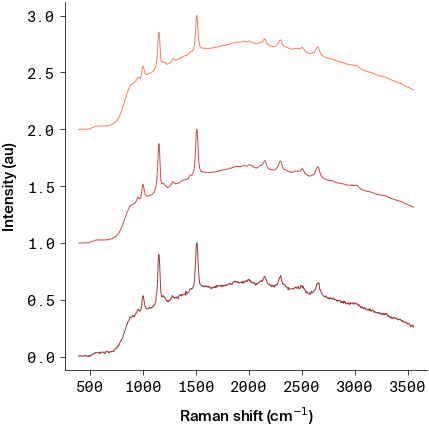

In [17]:
# Load data

df_hsal_100 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_HsalsolidcultureRep2_n_n_y_solid_100_0_5.csv"
)
df_hsal_1000 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_HsalsolidcultureRep2_n_n_y_solid_1000_0_5.csv"
)
df_hsal_10000 = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/"
    "2024-09-03_HsalsolidcultureRep2_n_n_y_solid_10000_0_5.csv"
)

# Min max scale the Baselined Filtered Intensity column in each dataset using minmax_scale

df_hsal_100["Scaled Intensity"] = minmax_scale(df_hsal_100, "Baselined Filtered Intensity (a.u.)")
df_hsal_1000["Scaled Intensity"] = minmax_scale(df_hsal_1000, "Baselined Filtered Intensity (a.u.)")
df_hsal_10000["Scaled Intensity"] = minmax_scale(
    df_hsal_10000, "Baselined Filtered Intensity (a.u.)"
)

# Plot data using offsets and reds

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]
colors = apc.palettes.red_shades.colors[0:3]

ax.plot(
    df_hsal_100["Raman shift (cm-1)"],
    df_hsal_100["Scaled Intensity"] + offsets[0],
    color=colors[0],
    lw=1,
)

ax.plot(
    df_hsal_1000["Raman shift (cm-1)"],
    df_hsal_1000["Scaled Intensity"] + offsets[1],
    color=colors[1],
    lw=1,
)

ax.plot(
    df_hsal_10000["Raman shift (cm-1)"],
    df_hsal_10000["Scaled Intensity"] + offsets[2],
    color=colors[2],
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig13/Fig13_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 14: Biological Samples in solid with backgrounds 

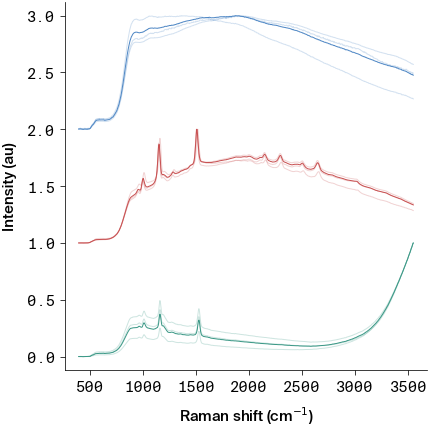

In [18]:
# Load data

df_chlamy_1_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Chlamy124"
    "solidcultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_chlamy_2_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Chlamy124"
    "solidcultureRep2_n_n_y_solid_10000_0_5.csv"
)
df_chlamy_3_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Chlamy124"
    "solidcultureRep3_n_n_y_solid_10000_0_5.csv"
)
df_TAP_agar_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_ChlamyTAP"
    "Agar_n_n_y_solid_10000_0_5.csv"
)

df_halo_1_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Hsalsolid"
    "cultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_halo_2_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Hsalsolid"
    "cultureRep2_n_n_y_solid_10000_0_5.csv"
)
df_halo_3_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Hsalsolid"
    "cultureRep4_n_n_y_solid_10000_0_5.csv"
)
df_halo_agar_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_Hsal" "Agar_n_n_y_solid_10000_0_5.csv"
)

df_ecoli_1_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_EcoliK12"
    "solidcultureRep1_n_n_y_solid_10000_0_5.csv"
)
df_ecoli_2_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_EcoliK12"
    "solidcultureRep2_n_n_y_solid_10000_0_5.csv"
)
df_ecoli_3_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_EcoliK12"
    "solidcultureRep3_n_n_y_solid_10000_0_5.csv"
)
df_ecoli_agar_solid = pd.read_csv(
    "../data/processed/processed_data/2024-09-03/2024-09-03_EcoliK12"
    "LBAgar_n_n_y_solid_10000_0_5.csv"
)

# Create an average of the three replicates for each dataset

df_chlamy_solid = pd.concat([df_chlamy_1_solid, df_chlamy_2_solid, df_chlamy_3_solid])
df_chlamy_solid = df_chlamy_solid.groupby("Raman shift (cm-1) adjusted").mean().reset_index()

df_halo_solid = pd.concat([df_halo_1_solid, df_halo_2_solid, df_halo_3_solid])
df_halo_solid = df_halo_solid.groupby("Raman shift (cm-1) adjusted").mean().reset_index()

df_ecoli_solid = pd.concat([df_ecoli_1_solid, df_ecoli_2_solid, df_ecoli_3_solid])
df_ecoli_solid = df_ecoli_solid.groupby("Raman shift (cm-1) adjusted").mean().reset_index()

# Min max scale the Baselined Filtered Intensity column in each dataset using minmax_scale

df_chlamy_1_solid["Scaled Intensity"] = minmax_scale(
    df_chlamy_1_solid, "Baselined Filtered Intensity (a.u.)"
)
df_chlamy_2_solid["Scaled Intensity"] = minmax_scale(
    df_chlamy_2_solid, "Baselined Filtered Intensity (a.u.)"
)
df_chlamy_3_solid["Scaled Intensity"] = minmax_scale(
    df_chlamy_3_solid, "Baselined Filtered Intensity (a.u.)"
)
df_chlamy_solid["Scaled Intensity"] = minmax_scale(
    df_chlamy_solid, "Baselined Filtered Intensity (a.u.)"
)
df_halo_1_solid["Scaled Intensity"] = minmax_scale(
    df_halo_1_solid, "Baselined Filtered Intensity (a.u.)"
)
df_halo_2_solid["Scaled Intensity"] = minmax_scale(
    df_halo_2_solid, "Baselined Filtered Intensity (a.u.)"
)
df_halo_3_solid["Scaled Intensity"] = minmax_scale(
    df_halo_3_solid, "Baselined Filtered Intensity (a.u.)"
)
df_halo_solid["Scaled Intensity"] = minmax_scale(
    df_halo_solid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_1_solid["Scaled Intensity"] = minmax_scale(
    df_ecoli_1_solid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_2_solid["Scaled Intensity"] = minmax_scale(
    df_ecoli_2_solid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_3_solid["Scaled Intensity"] = minmax_scale(
    df_ecoli_3_solid, "Baselined Filtered Intensity (a.u.)"
)
df_ecoli_solid["Scaled Intensity"] = minmax_scale(
    df_ecoli_solid, "Baselined Filtered Intensity (a.u.)"
)

# Plot data with offsets with each replicate the same color

figure_size = apc.mpl.get_figure_dimensions("full_square")
fig, ax = plt.subplots(
    figsize=figure_size,
    constrained_layout=True,
)

offsets = [i for i in range(10)]

ax.plot(
    df_chlamy_1_solid["Raman shift (cm-1) adjusted"],
    df_chlamy_1_solid["Scaled Intensity"] + offsets[0],
    color=apc.seaweed,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_chlamy_2_solid["Raman shift (cm-1) adjusted"],
    df_chlamy_2_solid["Scaled Intensity"] + offsets[0],
    color=apc.seaweed,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_chlamy_3_solid["Raman shift (cm-1) adjusted"],
    df_chlamy_3_solid["Scaled Intensity"] + offsets[0],
    color=apc.seaweed,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_chlamy_solid["Raman shift (cm-1) adjusted"],
    df_chlamy_solid["Scaled Intensity"] + offsets[0],
    color=apc.seaweed,
    lw=1,
)
ax.plot(
    df_halo_1_solid["Raman shift (cm-1) adjusted"],
    df_halo_1_solid["Scaled Intensity"] + offsets[1],
    color=apc.dragon,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_halo_2_solid["Raman shift (cm-1) adjusted"],
    df_halo_2_solid["Scaled Intensity"] + offsets[1],
    color=apc.dragon,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_halo_3_solid["Raman shift (cm-1) adjusted"],
    df_halo_3_solid["Scaled Intensity"] + offsets[1],
    color=apc.dragon,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_halo_solid["Raman shift (cm-1) adjusted"],
    df_halo_solid["Scaled Intensity"] + offsets[1],
    color=apc.dragon,
    lw=1,
)
ax.plot(
    df_ecoli_1_solid["Raman shift (cm-1) adjusted"],
    df_ecoli_1_solid["Scaled Intensity"] + offsets[2],
    color=apc.aegean,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_ecoli_2_solid["Raman shift (cm-1) adjusted"],
    df_ecoli_2_solid["Scaled Intensity"] + offsets[2],
    color=apc.aegean,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_ecoli_3_solid["Raman shift (cm-1) adjusted"],
    df_ecoli_3_solid["Scaled Intensity"] + offsets[2],
    color=apc.aegean,
    alpha=0.25,
    lw=1,
)
ax.plot(
    df_ecoli_solid["Raman shift (cm-1) adjusted"],
    df_ecoli_solid["Scaled Intensity"] + offsets[2],
    color=apc.aegean,
    lw=1,
)

ax.set_xlabel("Raman shift (cm$^{-1}$)")
ax.set_ylabel("Intensity (AU)")
apc.mpl.style_plot(monospaced_axes="both")

apc.mpl.save_figure(
    "../figures/fig14/Fig14_base.svg",
    dpi=300,
    context="web",
)

plt.show()

### Figure 15: Time series of Chlamydomonas

/var/folders/4b/p_9mm1154fq89trqtsrjbyx80000gn/T/ipykernel_76218/2117233100.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(
/var/folders/4b/p_9mm1154fq89trqtsrjbyx80000gn/T/ipykernel_76218/2117233100.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


'../figures/fig15/Fig15A.gif'

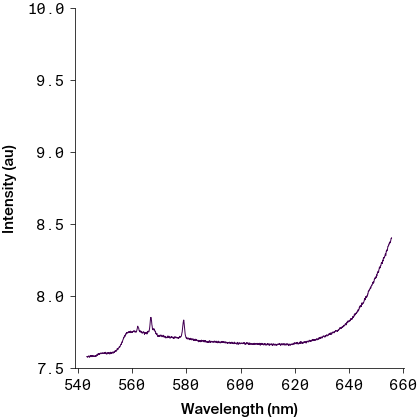

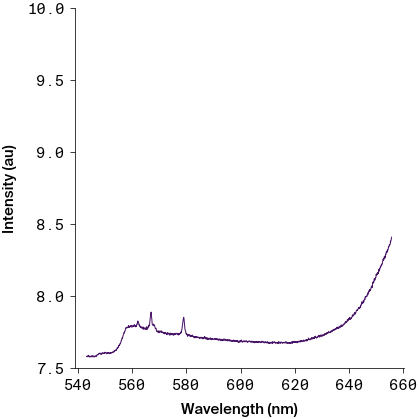

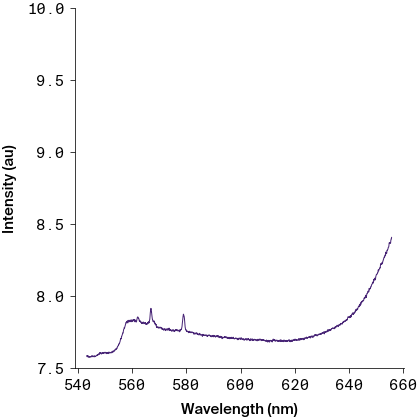

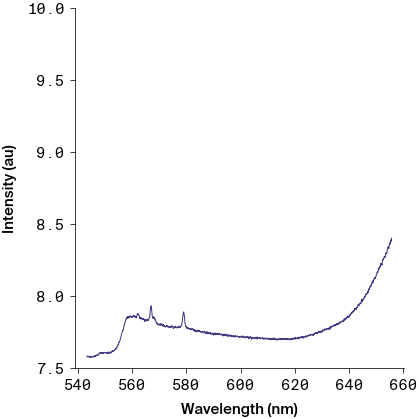

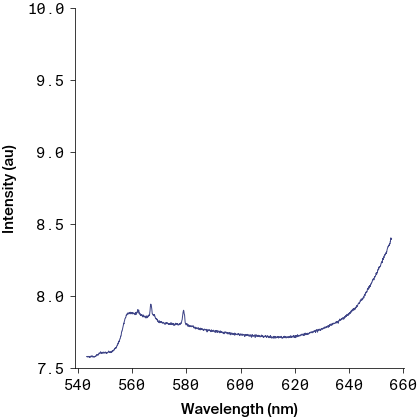

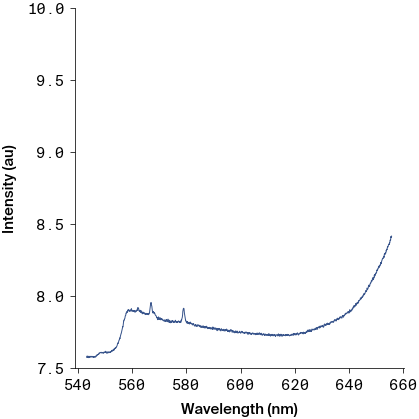

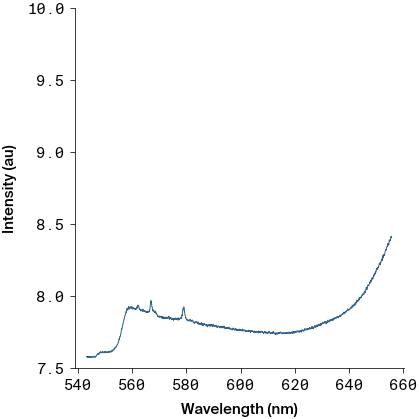

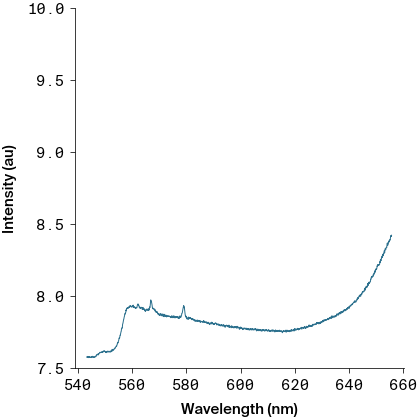

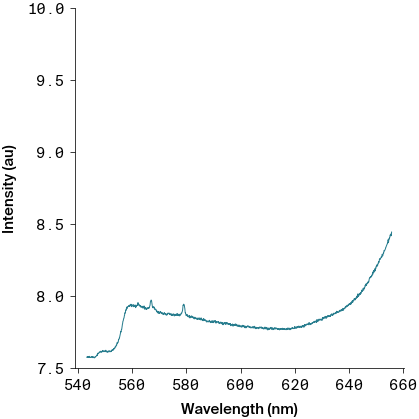

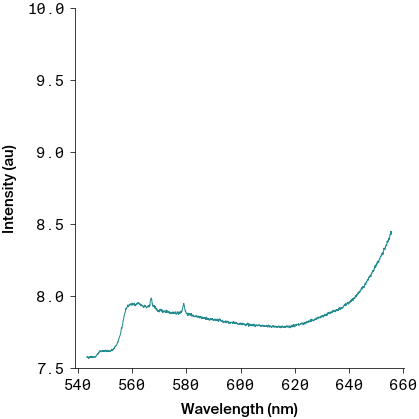

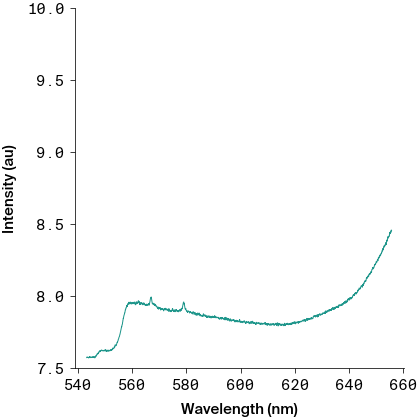

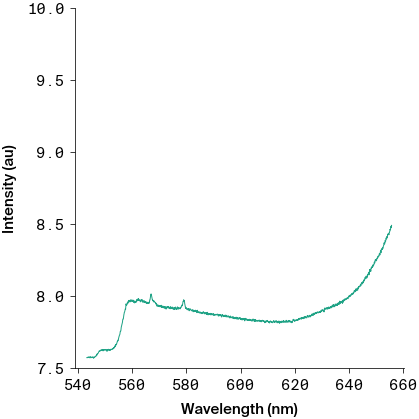

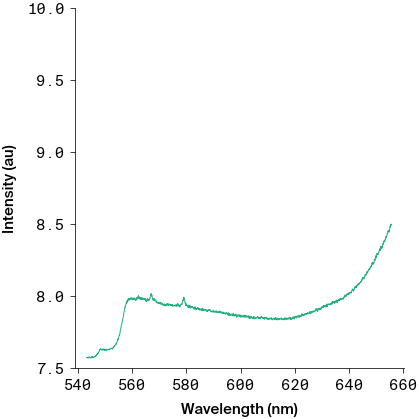

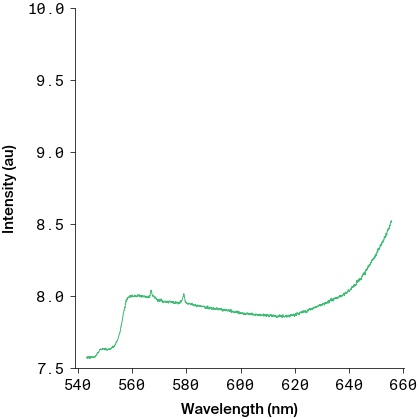

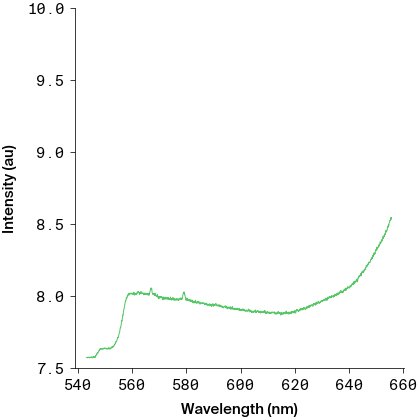

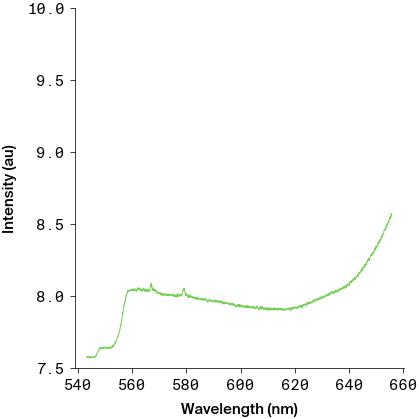

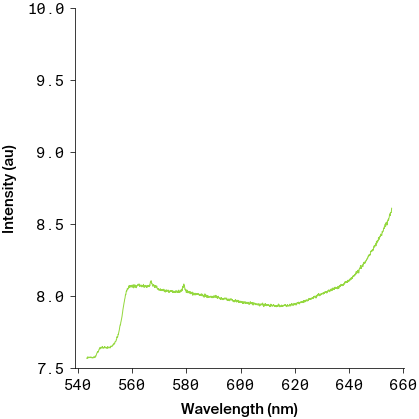

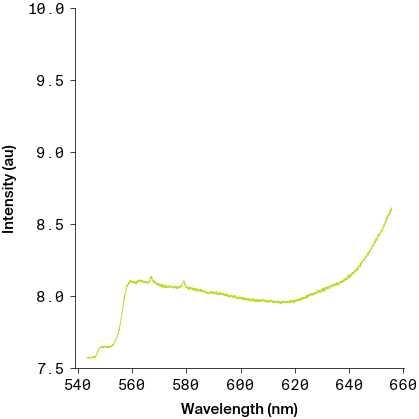

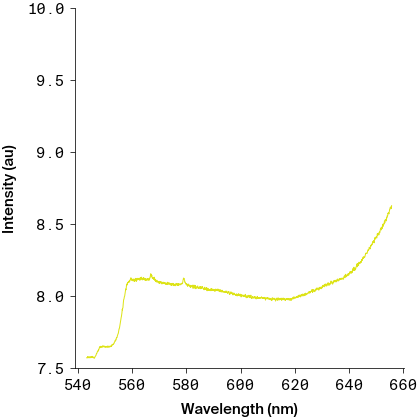

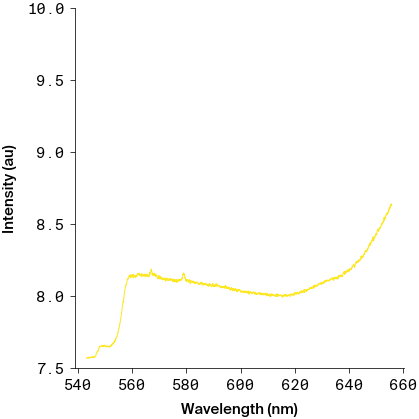

In [19]:
# Load data

Chlamy_gif_unbaselined_folder = (
    "../data/processed/processed_data/2024-09-04/"
    "2024-09-04_Chlamy124solidcultureTimeseries60sec20triggers_n_n_y_solid_1000_0_1"
)
plot_filenames = []

# Get a list of CSV files and sort them by timestamp in the filename

csv_files = sorted([f for f in os.listdir(Chlamy_gif_unbaselined_folder) if f.endswith(".csv")])

# Define fixed y limits

y_limits = (7.5, 10)

# Create a single color gradient from darkest to lightest

colors = plt.cm.viridis(np.linspace(0, 1, len(csv_files)))

# Create line plots for each file in the folder

for i, csv_file in enumerate(csv_files):
    # Load data

    df = pd.read_csv(os.path.join(Chlamy_gif_unbaselined_folder, csv_file))

    # Plot data

    figure_size = apc.mpl.get_figure_dimensions("half_square")
    fig, ax = plt.subplots(
        figsize=figure_size,
        constrained_layout=True,
    )

    ax.plot(
        df["Wavelength (nm)"],
        df["Intensity (a.u.)"],
        color=colors[i],
        lw=1,
    )

    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity (AU)")
    ax.set_ylim(y_limits)

    apc.mpl.style_plot(monospaced_axes="both")

    plot_filename = f"../figures/fig15/Fig15A_{i}.png"
    apc.mpl.save_figure(plot_filename, dpi=300, context="web")

    plot_filenames.append(plot_filename)


# Create a GIF from the plots

gif_path = "../figures/fig15/Fig15A.gif"

with imageio.get_writer(gif_path, mode="I", duration=2) as writer:
    for filename in plot_filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_path

/var/folders/4b/p_9mm1154fq89trqtsrjbyx80000gn/T/ipykernel_76218/2015926062.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


'../figures/fig15/Fig15B.gif'

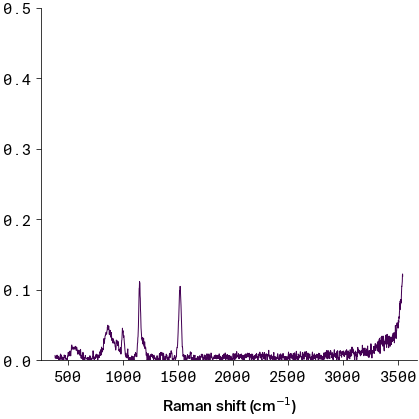

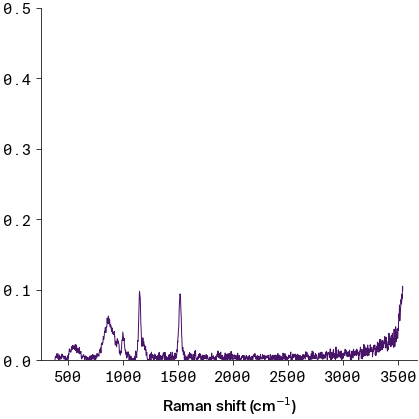

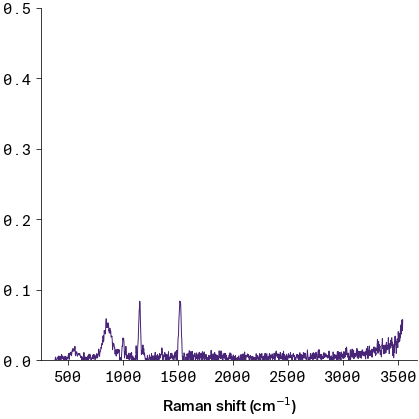

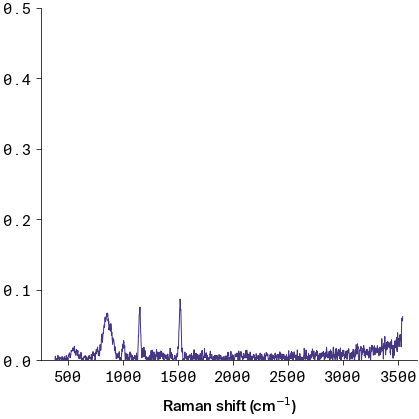

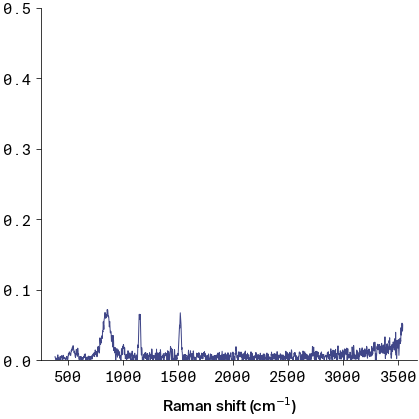

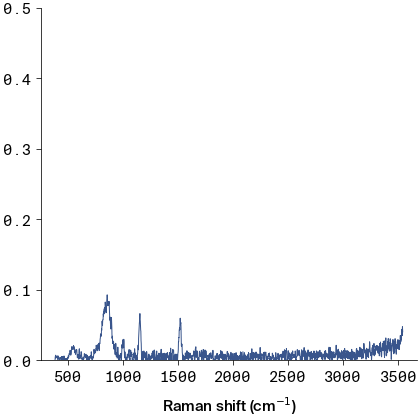

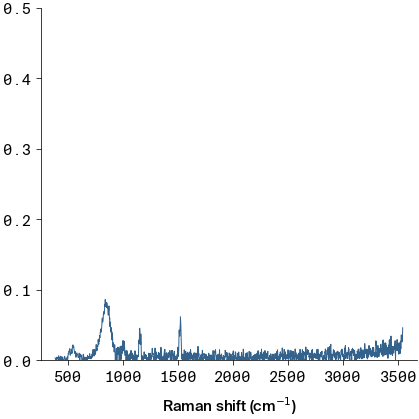

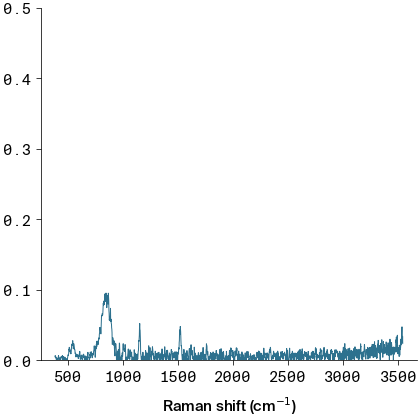

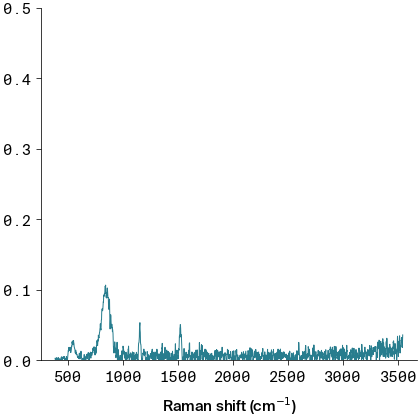

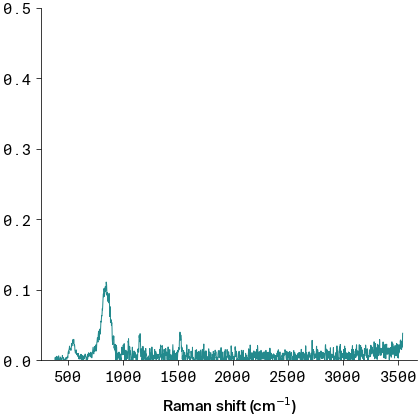

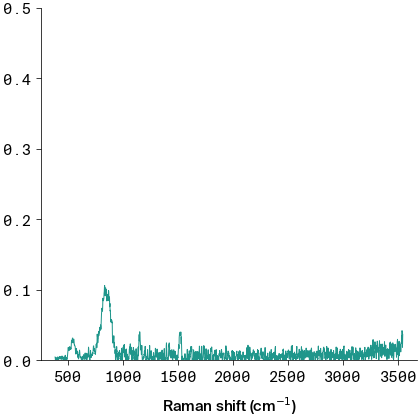

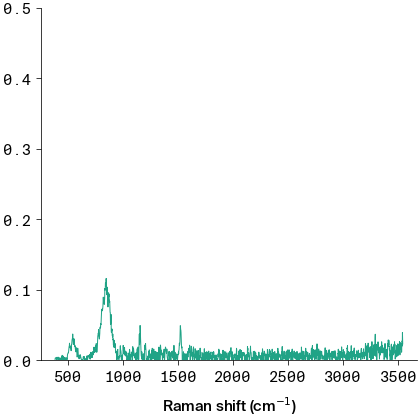

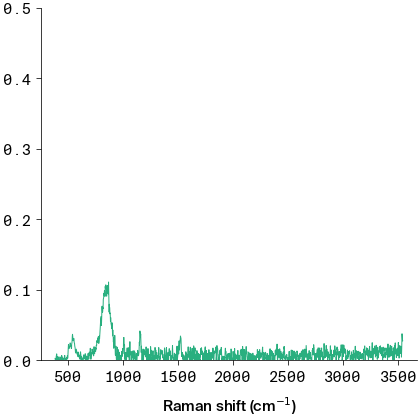

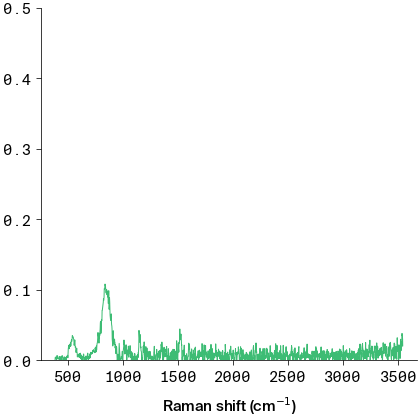

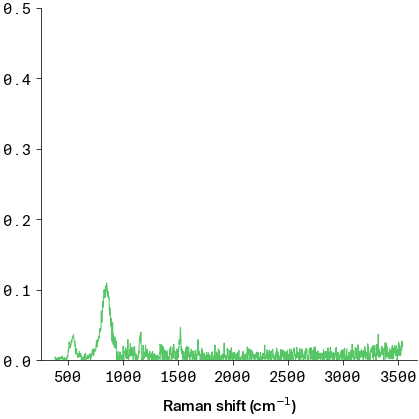

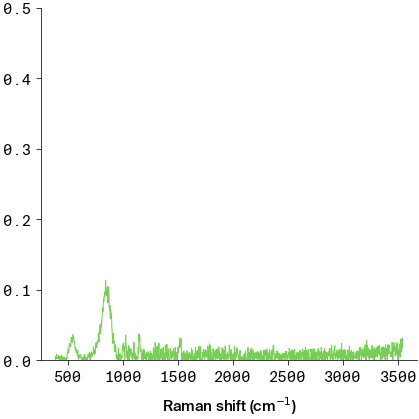

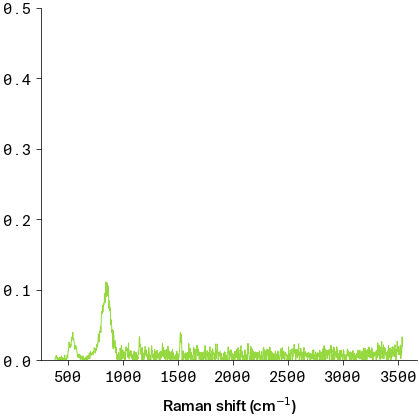

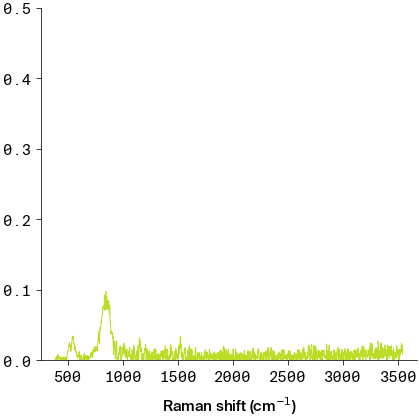

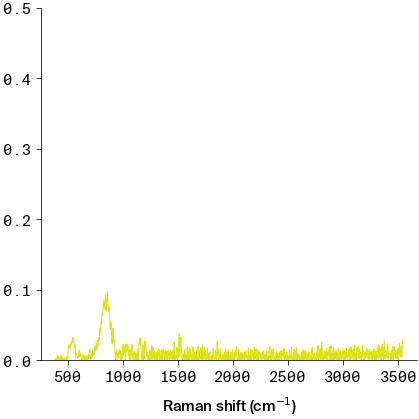

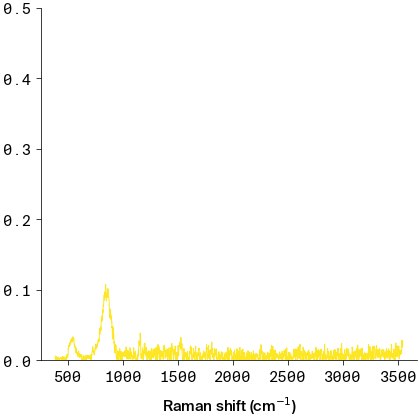

In [20]:
# Load data

Chlamy_gif_baselined_folder = (
    "../data/processed/processed_data/2024-09-04/"
    "2024-09-04_Chlamy124solidcultureTimeseries60sec20triggers_n_y_y_solid_1000_0_1"
)
plot_filenames = []

# Get a list of CSV files and sort them by timestamp in the filename

csv_files = sorted([f for f in os.listdir(Chlamy_gif_baselined_folder) if f.endswith(".csv")])

# Define fixed x and y limits

x_limits = (600, 3600)
y_limits = (0, 0.5)

# Create a single color gradient from darkest to lightest

colors = plt.cm.viridis(np.linspace(0, 1, len(csv_files)))

# Create line plots for each file in the folder

for i, csv_file in enumerate(csv_files):
    # Load data

    df = pd.read_csv(os.path.join(Chlamy_gif_baselined_folder, csv_file))

    # Plot data

    figure_size = apc.mpl.get_figure_dimensions("half_square")
    fig, ax = plt.subplots(
        figsize=figure_size,
        constrained_layout=True,
    )

    ax.plot(
        df["Raman shift (cm-1) adjusted"],
        df["Intensity (a.u.)"],
        color=colors[i],
        lw=1,
    )

    ax.set_xlabel("Raman shift (cm$^{-1}$)")
    ax.set_ylim(y_limits)

    apc.mpl.style_plot(monospaced_axes="both")

    plot_filename = f"../figures/fig15/Fig15B_{i}.png"
    apc.mpl.save_figure(plot_filename, dpi=300, context="web")

    plot_filenames.append(plot_filename)


# Create a GIF from the plots

gif_path = "../figures/fig15/Fig15B.gif"

with imageio.get_writer(gif_path, mode="I", duration=2) as writer:
    for filename in plot_filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_path